#### Building a regression model to predict storefront location revenue

Build a model that can (1) describe the relationship between revenue and
factors related to the storefront's location, and (2) can predict
the revenue of a store based on its location and age. Build a
linear regression model to predict storefront location revenue
based on information about the area the storefront is located
in and explore the model coefficients:

2. Create a variable, X, with the predictors in it, and store the outcome (revenue) in a separate variable, y.
3. Split the data into a training and test set. Use random_state = 100.
4. Create a linear regression model and fit it on the training data.
5. Print out the model coefficients.
6. Print out the model intercept.
7. Produce a prediction for a location that has 3 competitors; a median income of 30,000; 1,200 loyalty members; a population density of 2,000; and a location age of 10. The result should be an array with a single value of 27573.21782447, indicating the predicted revenue for a customer with this data.
8. Plot the model's predictions versus the true values on the test data.
9. Calculate the correlation between the model predictions and the true values of the test data. The result should be (0.9061597827907563, 1.1552714895198058e94).

In [1]:
import pandas as pd

df = pd.read_csv('data_science/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [2]:
X = df[['num_competitors',
       'median_income',
       'num_loyalty_members',
       'population_density',
       'location_age'
       ]]

y = df['revenue']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [6]:
model.intercept_

-51068.63644236389

In [7]:
single_location = pd.DataFrame({
    'num_competitors': [3],
    'median_income': [30000],
    'num_loyalty_members': [1200],
    'population_density': [2000],
    'location_age': [10]
})

model.predict(single_location)

array([27573.21782447])

In [8]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

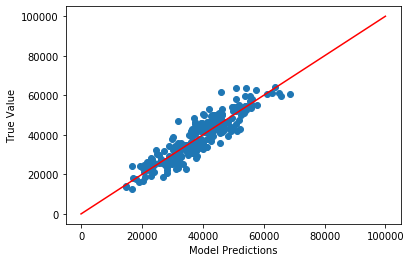

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'r')
plt.show()

In [11]:
from scipy.stats.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

(0.9061597827907563, 1.1552714895196922e-94)